In [126]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.optimize as opt
import pandas as pd
from scipy import stats

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

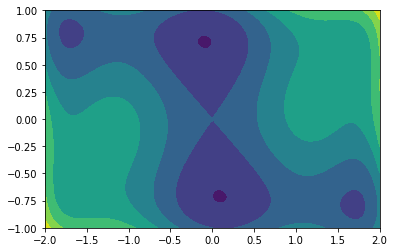

In [127]:
def func(x,y):
    return (4-2.1*(x**2)+(1/3)*(x**4))*(x**2)+x*y+(y**2)*4*(y**2-1)
def f_np(x_v):
    return (4-2.1*(x_v[0]**2)+(1/3)*(x_v[0]**4))*(x_v[0]**2)+x_v[0]*x_v[1]+(x_v[1]**2)*4*(x_v[1]**2-1)

x = np.linspace(-2,2,100)
y = np.linspace(-1,1,100)
x_g,y_g = np.meshgrid(x,y)
w = func(x_g,y_g)
plt.contourf(x,y,w)
plt.show()

In [128]:
x0=np.random.rand(2) #initial guess random
#opt.minimiza(f_np,x0)
#each time we obtain the same value which is a global minima, so it works properly
x1=[0.1,0.1]
opt.minimize(f_np,x1)

      fun: -1.0316284534898765
 hess_inv: array([[ 0.12944403, -0.00782512],
       [-0.00782512,  0.06155713]])
      jac: array([-1.49011612e-08, -1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 9
     njev: 12
   status: 0
  success: True
        x: array([-0.08984202,  0.7126564 ])

In [129]:
x2=[-0.1,-0.1]
opt.minimize(f_np,x2)

      fun: -1.031628453489877
 hess_inv: array([[ 0.12944139, -0.00782377],
       [-0.00782377,  0.06155748]])
      jac: array([1.49011612e-08, 1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 9
     njev: 12
   status: 0
  success: True
        x: array([ 0.08984201, -0.71265641])

In [130]:
#(0,0) initial guess
x3=np.zeros(2)
opt.minimize(f_np,x1)

      fun: -1.0316284534898765
 hess_inv: array([[ 0.12944403, -0.00782512],
       [-0.00782512,  0.06155713]])
      jac: array([-1.49011612e-08, -1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 9
     njev: 12
   status: 0
  success: True
        x: array([-0.08984202,  0.7126564 ])

### Answer to ex1

These 2 are the global minima found:

[-0.08984202,  0.7126564 ]

[ 0.08984201, -0.71265641]

In (0,0) there's a saddle point and if we use it as initial point, the procedure gets stuck at (0,0). In fact we can notice the low nfev number (number of function evaluation) which is 3.

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

[17 19 21 28 33 38 37 37 31 23 19 18]
[-62 -59 -56 -46 -32 -18  -9 -13 -25 -46 -52 -58]


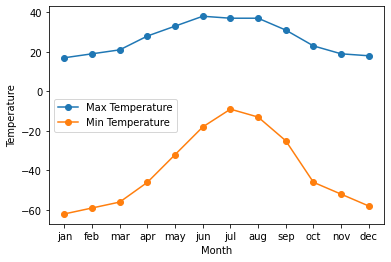

In [131]:
maxT=np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
print(maxT)
minT=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
print(minT)

labels = ['jan','feb','mar','apr','may','jun', 'jul','aug','sep', 'oct', 'nov', 'dec']

x = np.linspace(1, 12, 12)

fig, ax = plt.subplots(1,1)
ax.plot_date(x, maxT, linestyle='solid', label="Max Temperature")
ax.plot_date(x, minT, linestyle='solid', label="Min Temperature")
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.legend()
plt.show()

[52.64929219  7.16452596  7.80836295 38.67906324] 

[[ 1.96936228e+00 -8.73500888e-04  1.79558632e-01 -1.05130241e+00]
 [-8.73500888e-04  2.22849932e-03 -3.89293583e-04  1.09101458e-03]
 [ 1.79558632e-01 -3.89293583e-04  3.60637355e-01 -5.58403705e-01]
 [-1.05130241e+00  1.09101458e-03 -5.58403705e-01  1.41330578e+00]] 

[23.09208055  6.73581603 10.528856   15.77932956] 

[[ 1.32863847e+00 -1.60409906e-03  9.31303798e-01 -1.08336226e+00]
 [-1.60409906e-03  6.31512663e-03 -1.94765608e-03  1.91632391e-03]
 [ 9.31303798e-01 -1.94765608e-03  2.31997728e+00 -1.56873208e+00]
 [-1.08336226e+00  1.91632391e-03 -1.56873208e+00  1.38428178e+00]] 



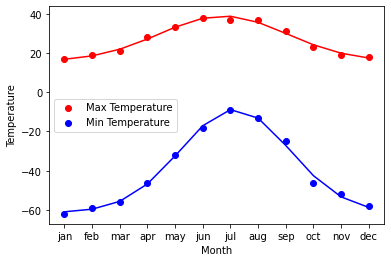

In [132]:
def ftemp(x, a, b, c,d):
    return a*np.exp(-(x-b)**2/c)+d

par_min,par_min_covariance = opt.curve_fit(ftemp, x, minT+100)
par_max,par_max_covariance = opt.curve_fit(ftemp, x, maxT)

print(par_min,'\n')
print (par_min_covariance,'\n')
print(par_max,'\n')
print (par_max_covariance,'\n')

fig, ax = plt.subplots(1,1)
ax.plot(x,ftemp(x, par_max[0], par_max[1], par_max[2], par_max[3]), color='red')
ax.scatter(x,maxT,label="Max Temperature",color='red')
ax.scatter(x,minT,label="Min Temperature",color='blue')
ax.plot(x,ftemp(x, par_min[0], par_min[1], par_min[2], par_min[3])-100,color='blue')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.legend()
plt.show()

### Answer to ex2 

As we can see from the plot the fit is reasonable. Also the parameters and the covariance matrix are reasonable.

The time offset for min and max temperatures within the fit accuracy is not the same.

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [133]:
file = pd.read_pickle('data/residuals_261.pkl')
data_pickle = np.array(file, ndmin=1)
data = data_pickle[0]
df = pd.DataFrame(data)
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


Text(0, 0.5, 'Entries')

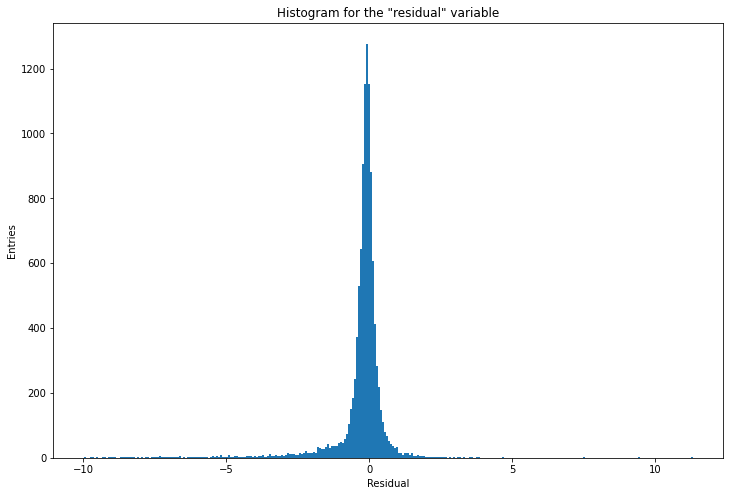

In [134]:
df = df[df['residuals'] > -10] # to delete outliers, in this way the plot is more meaningful
fig, ax = plt.subplots(figsize=(12,8))
h, bins, _ = plt.hist(df['residuals'], bins=300)
#print(h)
#print(bins)
ax.set_title('Histogram for the "residual" variable')
ax.set_xlabel('Residual')
ax.set_ylabel('Entries')

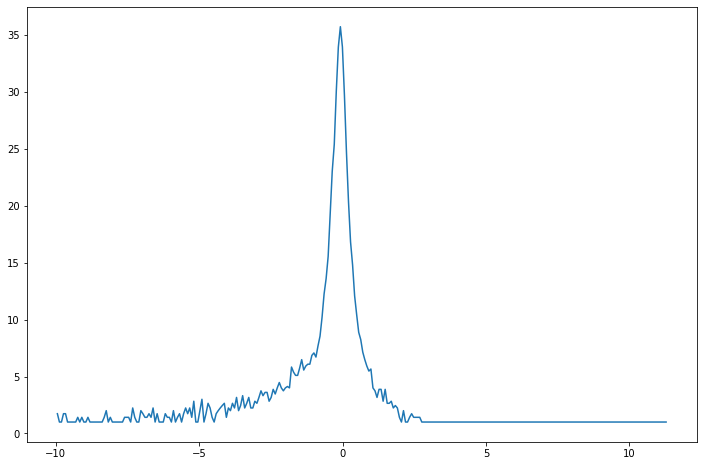

In [135]:
fig, ax = plt.subplots(figsize=(12,8))

centers = 0.5 * (bins[:-1] + bins[1:])
sigma_i = np.sqrt(np.abs(h))
sigma_i[sigma_i == 0] = 1 # in this way we can solve the NaN values

ax.plot(centers, sigma_i)

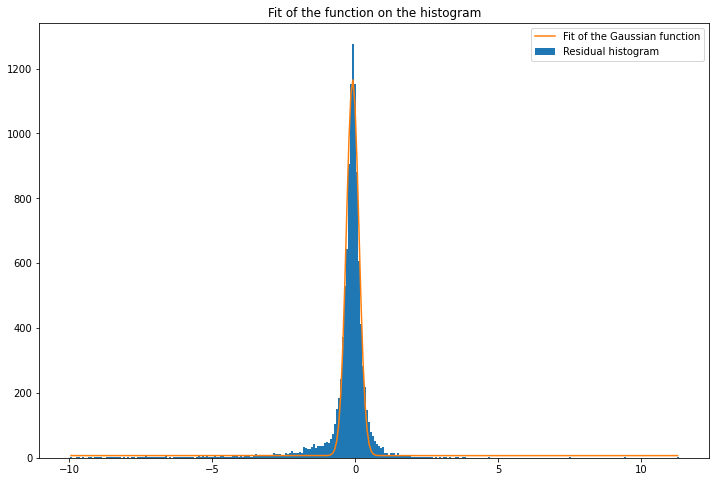

In [136]:
def fgauss(x, H, A, y, sigma):
    return H + A * np.exp(-(x - y) ** 2 / (2 * sigma ** 2))

params, params_cov = opt.curve_fit(fgauss, centers, h, full_output=False)

fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(df['residuals'], bins=300, label='Residual histogram')
plt.plot(centers, fgauss(centers, *params), label='Fit of the Gaussian function')

ax.set_title('Fit of the function on the histogram')
ax.legend()

In [137]:
ndof = len(centers) - 1
print("n degrees of freedom =", ndof)
# calculate the chi^2
chi2 = np.sum(((h - fgauss(centers, *params))**2) / sigma_i)
print("chi2 =", chi2)
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory

n degrees of freedom = 299
chi2 = 16799.46580852137
p-value = 0.0


As we can see, the fit is not satisfactory.

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

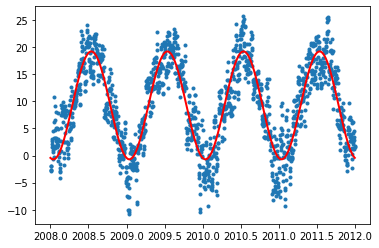

In [138]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

date, temperature = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt', unpack=True)
#lets assume the range going from 2008 to 2012 (excluded)
keep = (np.abs(date) >= 2008) & (np.abs(date) <2012) & (np.abs(temperature) < 90)
date = date[keep] 
temperature = temperature[keep]

def fcos(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

popt, pcov = opt.curve_fit(fcos, date, temperature)

plt.plot(date, temperature, '.')
x = np.linspace(2008, 2012, len(temperature))
plt.plot(x, fcos(x, *popt), color='red', lw=2)

In [139]:
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print("a = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("b = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("c = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))

parameters:
 [-9.96203467 12.33174286  9.26282131]
covariance matrix:
 [[ 1.75558202e-02  9.85998069e-07 -2.76510821e-06]
 [ 9.85998069e-07  1.77326375e-04  5.40547897e-08]
 [-2.76510821e-06  5.40547897e-08  8.78853325e-03]]
a = -9.96 +- 0.13
b = 12.33 +- 0.01
c = 9.26 +- 0.09


In [140]:
avg_temp = temperature.mean()

print('Overall average temperature in Munich: ', avg_temp)

Overall average temperature in Munich:  9.261252084167237


In [141]:
df1 = pd.read_csv('data/munich_temperatures_average_with_bad_data.txt', sep=' ', names=['Time', 'Temperature'])
df1[['Year', 'Day']] = df1['Time'].astype(str).str.split('.', expand=True).astype(int)

df2 = df1[df1['Year'].between(2008, 2011)] #as before, lets assume the range from 2008 to 2012 (excluded)
df2 = df2[df2['Temperature'] < 90]

avg_temp_max = df2.groupby('Year')['Temperature'].max().mean()
avg_temp_min = df2.groupby('Year')['Temperature'].min().mean()

print('The max average temperature is: ', avg_temp_max)
print('The min average temperature is: ', avg_temp_min)

The max average temperature is:  24.6389
The min average temperature is:  -8.625005


### Answer

The b parameter is the phase. It's meaning is to shift the same sinusoidal function in time.

In [142]:
def f_new(t, a, b, c, d):
    return a * np.cos(2 * np.pi * t * b + c) + d

SSR: 18662.47749887979 18663.716739583957
Test fcos vs f_new:
CL: 1.000 , additional parameter necessary: NO


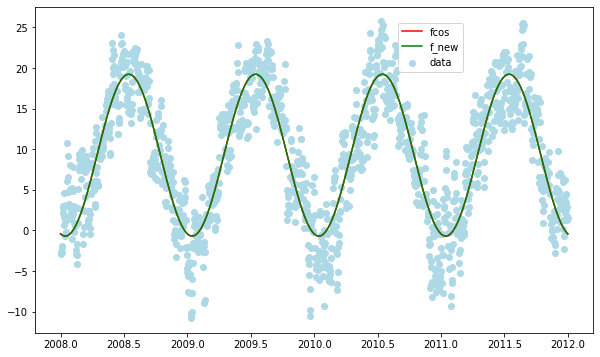

In [143]:
from scipy.stats import f

# define function for F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

N=len(temperature)
x = np.linspace(2008, 2012, N)
y = temperature

fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.scatter(date, temperature, marker='o', c='lightblue', label="data")

popt1, pcov1 = opt.curve_fit(fcos, date, temperature)
y1 = fcos(x, *popt1)
ax.plot(x, y1, color='r', label="fcos")
ssr_1 = np.sum((y1 - y)**2)

popt2, pcov2 = opt.curve_fit(f_new, date, temperature)
y2 = f_new(x, *popt2)
ax.plot(x, y2, color='g', label="f_new")
ssr_2 = np.sum((y2 - y)**2)

ax.legend(loc=(0.65, 0.8))

print("SSR:", ssr_1, ssr_2)

# run F-test
# test f2 vs f1
print("Test fcos vs f_new:")
cl_1_vs_2 = Ftest(ssr_1, ssr_2, 2, 3, N, verbose=True)

### Comment to ex4

We can see that the function with 3 parameters is able to approximate the data. So the additional parameter is not needed. At the end, the best-fit values of the parameters are always: a = -9.96, b = 12.33, c = 9.26